In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [3]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [4]:
from geoband.API import *

GetCompasData('PJT002_train.csv')
GetCompasData('PJT002_test.csv')
GetCompasData('PJT002_validation.csv')
GetCompasData('PJT002_submission.csv')

train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
y_pred = ['N']*len(val)
y_val = val['fr_yn']

f1_score(y_val, y_pred,pos_label='Y')

/opt/app-root/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [6]:
X_train = train.drop(['fr_yn', 'dt_of_fr'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr'], 1)
y_val = val['fr_yn']
test = test.drop(['dt_of_fr'], 1)

In [7]:
df_all = pd.concat([X_train, X_val, test],sort=False)

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(train)]
X_val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

In [8]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [9]:
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred,pos_label='Y')

0.49243353783231086

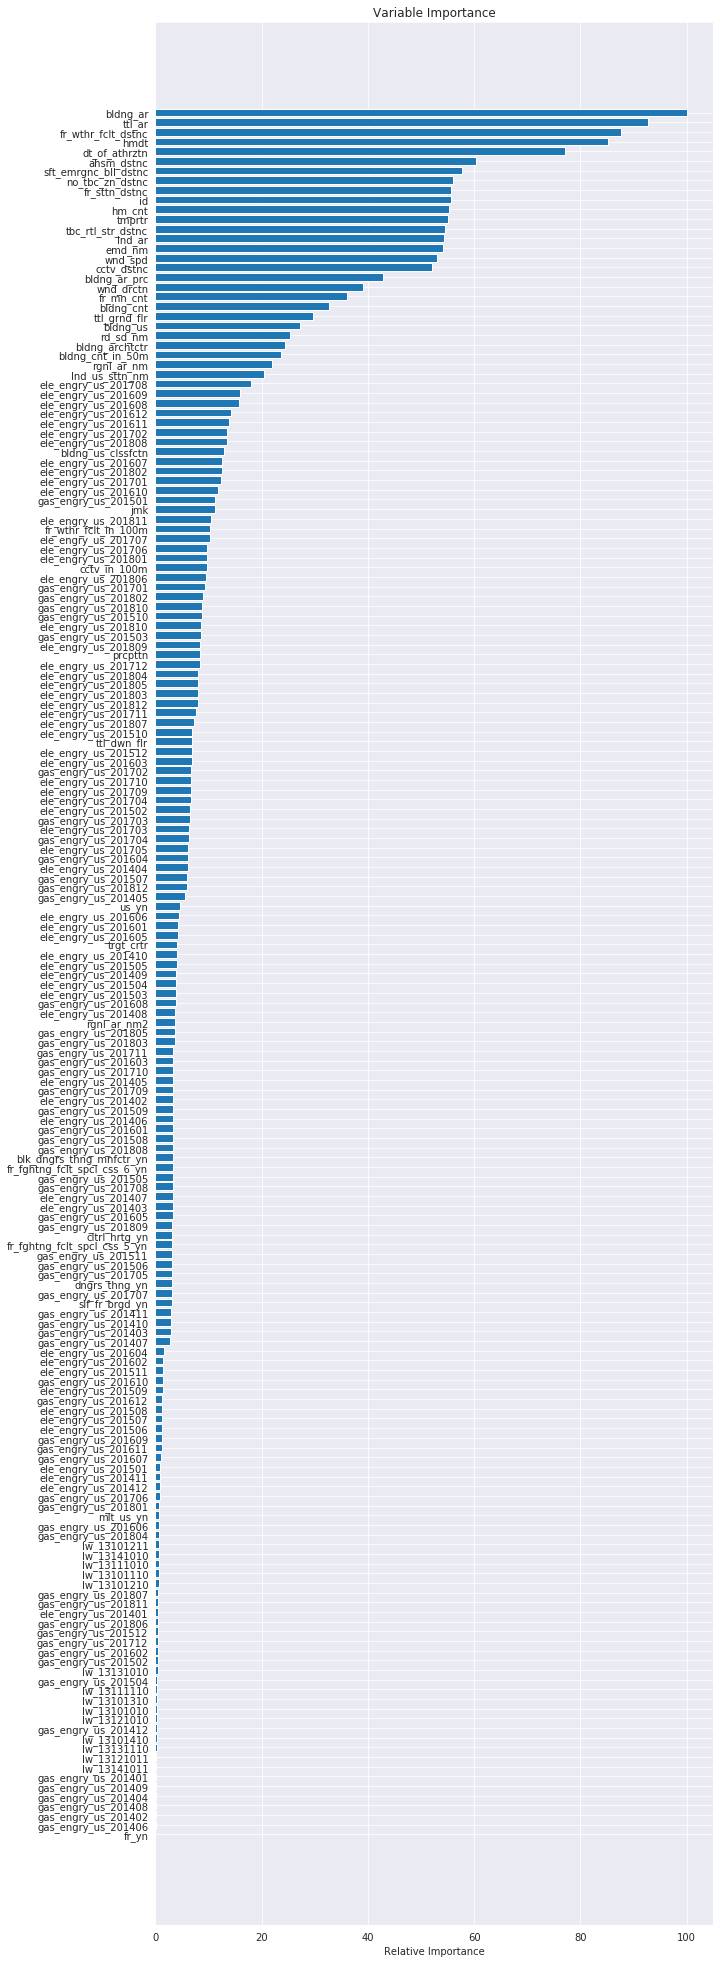

In [10]:
plot_feature_importance(model, X_train, (10, 35))